In [1]:
import re
import nltk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:

train = pd.read_excel('/content/Data_Train.xlsx')
test = pd.read_excel('/content/Data_Test.xlsx')

In [3]:
train.shape, test.shape

((6237, 9), (1560, 8))

In [4]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [6]:

train['Price'].value_counts()

299.00     108
399.00      85
449.00      59
295.00      49
319.00      48
          ... 
1098.00      1
3340.00      1
1837.00      1
2216.63      1
2695.00      1
Name: Price, Length: 1614, dtype: int64

In [0]:
#train = train[train['Price'] < 10000].reset_index(drop=True)

In [8]:
df = train.append(test,ignore_index=True)
df.shape


(7797, 9)

In [0]:
df.columns = ['Author', 'BookCategory', 'Edition', 'Genre', 'Price', 'Reviews', 'Ratings', 'Synopsis', 'Title']


In [0]:
df['Title_1'] = df['Title'].str.extract(r"\((.*?)\)", expand=False) 
df['Title_1'] = df['Title_1'].fillna('missingTitle') 

In [0]:
df['Genre'] = df['Genre'].str.replace(r"\(.*\)","")

In [0]:
df['Reviews'] = df['Reviews'].str.replace(',','')
df['Reviews'] = df['Reviews'].str.split().str.get(0).astype(float)

In [13]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Reviews,Ratings,Synopsis,Title,Title_1
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure,220.00,8.0,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3),The Hunters 3
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast,202.93,14.0,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts,missingTitle
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6.0,4.8 out of 5 stars,"""During the time men live without a common Pow...",Leviathan (Penguin Classics),Penguin Classics
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction,180.00,13.0,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple),Miss Marple
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1.0,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography,missingTitle


In [0]:
df['Ratings'] = df['Ratings'].str.split().str.get(0).astype(float)

In [0]:
df['BookCategory_1'] = df['BookCategory'].str.split(',').str[0]
df['BookCategory_2'] = df['BookCategory'].str.split(',').str[1]
df['BookCategory_2'] = df['BookCategory_2'].fillna('missingBookCategory')

In [0]:
df['Edition_1'] = df['Edition'].str.split(',').str[0]
df['Edition_2'] = df['Edition'].str.split(',').str[1]
df['Edition_2'] = df['Edition_2'].str.replace('– ','')

In [0]:
df['Edition_year'] = pd.to_datetime(df['Edition_2'], errors='coerce').dt.year
df['Edition_month'] = pd.to_datetime(df['Edition_2'], errors='coerce').dt.month
df['Edition_date'] = pd.to_datetime(df['Edition_2'], errors='coerce').dt.day


In [18]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Reviews,Ratings,Synopsis,Title,Title_1,BookCategory_1,BookCategory_2,Edition_1,Edition_2,Edition_year,Edition_month,Edition_date
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure,220.00,8.0,4.0,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3),The Hunters 3,Action & Adventure,missingBookCategory,Paperback,10 Mar 2016,2016.0,3.0,10.0
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast,202.93,14.0,3.9,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts,missingTitle,Biographies,Diaries & True Accounts,Paperback,7 Nov 2012,2012.0,11.0,7.0
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6.0,4.8,"""During the time men live without a common Pow...",Leviathan (Penguin Classics),Penguin Classics,Humour,missingBookCategory,Paperback,25 Feb 1982,1982.0,2.0,25.0
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction,180.00,13.0,4.1,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple),Miss Marple,Crime,Thriller & Mystery,Paperback,5 Oct 2017,2017.0,10.0,5.0
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1.0,5.0,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography,missingTitle,Arts,Film & Photography,Hardcover,10 Oct 2006,2006.0,10.0,10.0


In [19]:
df.isnull().sum()

Author               0
BookCategory         0
Edition              0
Genre                0
Price             1560
Reviews              0
Ratings              0
Synopsis             0
Title                0
Title_1              0
BookCategory_1       0
BookCategory_2       0
Edition_1            0
Edition_2            0
Edition_year       993
Edition_month      993
Edition_date       993
dtype: int64

In [0]:
agg_func = {
    'Reviews': ['mean','median','min','max','sum'],
    'Ratings': ['mean','median','min','max','sum']
}
agg_BookCategory_1 = df.groupby('BookCategory_1').agg(agg_func)
agg_BookCategory_1.columns = [ 'BookCategory_1_' + ('_'.join(col).strip()) for col in agg_BookCategory_1.columns.values]
agg_BookCategory_1.reset_index(inplace=True)
df = df.merge(agg_BookCategory_1, on=['BookCategory_1'], how='left')


In [0]:
agg_func = {
    'Reviews': ['mean','median','min','max','sum'],
    'Ratings': ['mean','median','min','max','sum']
    
}
agg_BookCategory_2 = df.groupby('BookCategory_2').agg(agg_func)
agg_BookCategory_2.columns = [ 'BookCategory_2_' + ('_'.join(col).strip()) for col in agg_BookCategory_2.columns.values]
agg_BookCategory_2.reset_index(inplace=True)
df = df.merge(agg_BookCategory_2, on=['BookCategory_2'], how='left')

In [0]:
agg_func = {
    'Reviews': ['mean','median','min','max','sum'],
    'Ratings': ['mean','median','min','max','sum']
}
agg_Author = df.groupby('Author').agg(agg_func)
agg_Author.columns = [ 'Author_' + ('_'.join(col).strip()) for col in agg_Author.columns.values]
agg_Author.reset_index(inplace=True)
df = df.merge(agg_Author, on=['Author'], how='left')

In [0]:
agg_func = {
    'Reviews': ['mean','median','min','max','sum'],
    'Ratings': ['mean','median','min','max','sum']
}
agg_Genre = df.groupby('Genre').agg(agg_func)
agg_Genre.columns = [ 'Genre_' + ('_'.join(col).strip()) for col in agg_Genre.columns.values]
agg_Genre.reset_index(inplace=True)
df = df.merge(agg_Genre, on=['Genre'], how='left')


In [0]:
agg_func = {
    'Reviews': ['mean','median','min','max','sum'],
    'Ratings': ['mean','median','min','max','sum']
}
agg_Title = df.groupby('Title').agg(agg_func)
agg_Title.columns = [ 'Title_' + ('_'.join(col).strip()) for col in agg_Title.columns.values]
agg_Title.reset_index(inplace=True)
df = df.merge(agg_Title, on=['Title'], how='left')

In [0]:
calc = df.groupby(['Title'], axis=0).agg({'Title':[('op1', 'count')]}).reset_index() 
calc.columns = ['Title','Title Count']
df = df.merge(calc, on=['Title'], how='left')

calc = df.groupby(['BookCategory_1'], axis=0).agg({'BookCategory_1':[('op1', 'count')]}).reset_index() 
calc.columns = ['BookCategory_1','BookCategory_1 Count']
df = df.merge(calc, on=['BookCategory_1'], how='left')

calc = df.groupby(['Edition_year'], axis=0).agg({'Edition_year':[('op1', 'count')]}).reset_index() 
calc.columns = ['Edition_year','Edition_year Count']
df = df.merge(calc, on=['Edition_year'], how='left')

calc = df.groupby(['Edition_month'], axis=0).agg({'Edition_month':[('op1', 'count')]}).reset_index() 
calc.columns = ['Edition_month','Edition_month Count']
df = df.merge(calc, on=['Edition_month'], how='left')

calc = df.groupby(['Edition_date'], axis=0).agg({'Edition_date':[('op1', 'count')]}).reset_index() 
calc.columns = ['Edition_date','Edition_date Count']
df = df.merge(calc, on=['Edition_date'], how='left')


In [0]:
df['Title_Synopsis'] = df['Title'] + ' ' + df['Synopsis'] + ' ' + df['Author']

In [27]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Reviews,Ratings,Synopsis,Title,Title_1,BookCategory_1,BookCategory_2,Edition_1,Edition_2,Edition_year,Edition_month,Edition_date,BookCategory_1_Reviews_mean,BookCategory_1_Reviews_median,BookCategory_1_Reviews_min,BookCategory_1_Reviews_max,BookCategory_1_Reviews_sum,BookCategory_1_Ratings_mean,BookCategory_1_Ratings_median,BookCategory_1_Ratings_min,BookCategory_1_Ratings_max,BookCategory_1_Ratings_sum,BookCategory_2_Reviews_mean,BookCategory_2_Reviews_median,BookCategory_2_Reviews_min,BookCategory_2_Reviews_max,BookCategory_2_Reviews_sum,BookCategory_2_Ratings_mean,BookCategory_2_Ratings_median,BookCategory_2_Ratings_min,BookCategory_2_Ratings_max,BookCategory_2_Ratings_sum,Author_Reviews_mean,Author_Reviews_median,Author_Reviews_min,Author_Reviews_max,Author_Reviews_sum,Author_Ratings_mean,Author_Ratings_median,Author_Ratings_min,Author_Ratings_max,Author_Ratings_sum,Genre_Reviews_mean,Genre_Reviews_median,Genre_Reviews_min,Genre_Reviews_max,Genre_Reviews_sum,Genre_Ratings_mean,Genre_Ratings_median,Genre_Ratings_min,Genre_Ratings_max,Genre_Ratings_sum,Title_Reviews_mean,Title_Reviews_median,Title_Reviews_min,Title_Reviews_max,Title_Reviews_sum,Title_Ratings_mean,Title_Ratings_median,Title_Ratings_min,Title_Ratings_max,Title_Ratings_sum,Title Count,BookCategory_1 Count,Edition_year Count,Edition_month Count,Edition_date Count,Title_Synopsis
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure,220.00,8.0,4.0,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3),The Hunters 3,Action & Adventure,missingBookCategory,Paperback,10 Mar 2016,2016.0,3.0,10.0,38.594595,6.0,1.0,4787.0,39984.0,4.295560,4.4,1.0,5.0,4450.2,30.654990,5.0,1.0,4787.0,127770.0,4.336972,4.5,1.0,5.0,18076.5,5.25000,5.0,3.0,8.0,21.0,3.975000,4.05,3.2,4.6,15.9,43.431953,7.0,1.0,4787.0,51380.0,4.283432,4.3,1.0,5.0,5067.3,8.0,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0,4.0,1,1036,768.0,502.0,213.0,The Prisoner's Gold (The Hunters 3) THE HUNTER...
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast,202.93,14.0,3.9,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts,missingTitle,Biographies,Diaries & True Accounts,Paperback,7 Nov 2012,2012.0,11.0,7.0,83.542350,26.0,1.0,2255.0,61153.0,4.347678,4.4,1.5,5.0,3182.5,83.542350,26.0,1.0,2255.0,61153.0,4.347678,4.4,1.5,5.0,3182.5,14.00000,14.0,14.0,14.0,28.0,3.900000,3.90,3.9,3.9,7.8,11.032609,4.0,1.0,129.0,1015.0,4.341304,4.5,1.0,5.0,399.4,14.0,14.0,14.0,14.0,28.0,3.9,3.9,3.9,3.9,7.8,2,732,342.0,561.0,247.0,Guru Dutt: A Tragedy in Three Acts A layered p...
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6.0,4.8,"""During the time men live without a common Pow...",Leviathan (Penguin Classics),Penguin Classics,Humour,missingBookCategory,Paperback,25 Feb 1982,1982.0,2.0,25.0,15.623881,3.0,1.0,1563.0,10468.0,4.349552,4.5,1.0,5.0,2914.2,30.654990,5.0,1.0,4787.0,127770.0,4.336972,4.5,1.0,5.0,18076.5,6.00000,6.0,6.0,6.0,18.0,4.800000,4.80,4.8,4.8,14.4,9.200000,6.0,1.0,65.0,230.0,4.440000,4.7,3.0,5.0,111.0,6.0,6.0,6.0,6.0,18.0,4.8,4.8,4.8,4.8,14.4,3,670,14.0,428.0,225.0,"Leviathan (Penguin Classics) ""During the time ..."
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction,180.00,13.0,4.1,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple),Miss Marple,Crime,Thriller & Mystery,Paperback,5 Oct 2017,2017.0,10.0,5.0,41.369021,12.0,1.0,1392.0,36322.0,4.146583,4.2,1.0,5.0,3640.7,41.369021,12.0,1.0,1392.0,36322.0,4.146583,4.2,1.0,5.0,3640.7,59.91954,21.0,1.0,1392.0,5213.0,4.233333,4.30,3.0,5.0,368.3,34.593846,11.0,1.0,970.0,11243.0,4.124615,4.2,1.0,5.0,1340.5,13.0,13.0,13.0,13.0,13.0,4.1,4.1,4.1,4.1,4.1,1,878,775.0,705.0,342.0,A Pocket Full of Rye (Miss Marple) A handful o...
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [29]:
nltk.download('punkt')
nltk.download('wordnet')
def clean_reviews(review_text, logging=False):
    counter = 1
    clean_text = []
    for texts in review_text:
        if counter % 1000 == 0 and logging:
            print("Processed %d records." % (counter))
        counter += 1
        texts = texts.lower()
        texts = re.sub(r'www.[^ ]+', ' ', texts)
        texts = re.sub(r'https?://[^ ]+', ' ', texts)
        texts = re.sub(r'https://[^ ]+', ' ', texts)
        texts = re.sub(r'[^a-z]', ' ', texts)
        tokens = nltk.word_tokenize(texts)
        tokens = [tok for tok in tokens if len(tok) > 2]
        tokens = [lemma.lemmatize(token, pos='n') for token in tokens]
        tokens = ' '.join(tokens)
        clean_text.append(tokens)
    return pd.Series(clean_text)

clean_text = clean_reviews(df['Title_Synopsis'], logging=True)
df['Title_Synopsis'] = clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Processed 1000 records.
Processed 2000 records.
Processed 3000 records.
Processed 4000 records.
Processed 5000 records.
Processed 6000 records.
Processed 7000 records.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1, 3), min_df=5, token_pattern=r'\w{3,}', max_features=15000)
df_title = tf1.fit_transform(df['Title_Synopsis'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf1.get_feature_names())
df_title.shape

(7797, 15000)

In [31]:
df = pd.concat([df, df_title], axis=1) 
df.shape


(7797, 15073)

In [0]:
for col in ['BookCategory_1', 'BookCategory_2', 'Edition_1', 'Edition_2', 'Genre', 'Title_1']:
    df[col] = df[col].astype('category')


In [0]:
df.drop(['Synopsis','Title','BookCategory','Edition','Title_Synopsis','Author'], axis=1, inplace=True)

In [34]:
df.head()

,Genre,Price,Reviews,Ratings,Title_1,BookCategory_1,BookCategory_2,Edition_1,Edition_2,Edition_year,Edition_month,Edition_date,BookCategory_1_Reviews_mean,BookCategory_1_Reviews_median,BookCategory_1_Reviews_min,BookCategory_1_Reviews_max,BookCategory_1_Reviews_sum,BookCategory_1_Ratings_mean,BookCategory_1_Ratings_median,BookCategory_1_Ratings_min,BookCategory_1_Ratings_max,BookCategory_1_Ratings_sum,BookCategory_2_Reviews_mean,BookCategory_2_Reviews_median,BookCategory_2_Reviews_min,BookCategory_2_Reviews_max,BookCategory_2_Reviews_sum,BookCategory_2_Ratings_mean,BookCategory_2_Ratings_median,BookCategory_2_Ratings_min,BookCategory_2_Ratings_max,BookCategory_2_Ratings_sum,Author_Reviews_mean,Author_Reviews_median,Author_Reviews_min,Author_Reviews_max,Author_Reviews_sum,Author_Ratings_mean,Author_Ratings_median,Author_Ratings_min,...,your heart,your home,your idea,your imagination,your kid,your knowledge,your life,your mind,your organization,your own,your phone,your power,your script,your seat,your skill,your team,your time,your way,your work,yours,yourself,yourself and,yourself the,yourself with,yourself with ladybird,yousafzai,youth,youth and,youthful,youtube,yuvraj,yuvraj singh,zen,zen pencil,zero,zlatan,zoe,zombie,zone,zoo
0,Action & Adventure,220.00,8.0,4.0,The Hunters 3,Action & Adventure,missingBookCategory,Paperback,10 Mar 2016,2016.0,3.0,10.0,38.594595,6.0,1.0,4787.0,39984.0,4.295560,4.4,1.0,5.0,4450.2,30.654990,5.0,1.0,4787.0,127770.0,4.336972,4.5,1.0,5.0,18076.5,5.25000,5.0,3.0,8.0,21.0,3.975000,4.05,3.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cinema & Broadcast,202.93,14.0,3.9,missingTitle,Biographies,Diaries & True Accounts,Paperback,7 Nov 2012,2012.0,11.0,7.0,83.542350,26.0,1.0,2255.0,61153.0,4.347678,4.4,1.5,5.0,3182.5,83.542350,26.0,1.0,2255.0,61153.0,4.347678,4.4,1.5,5.0,3182.5,14.00000,14.0,14.0,14.0,28.0,3.900000,3.90,3.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,International Relations,299.00,6.0,4.8,Penguin Classics,Humour,missingBookCategory,Paperback,25 Feb 1982,1982.0,2.0,25.0,15.623881,3.0,1.0,1563.0,10468.0,4.349552,4.5,1.0,5.0,2914.2,30.654990,5.0,1.0,4787.0,127770.0,4.336972,4.5,1.0,5.0,18076.5,6.00000,6.0,6.0,6.0,18.0,4.800000,4.80,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Contemporary Fiction,180.00,13.0,4.1,Miss Marple,Crime,Thriller & Mystery,Paperback,5 Oct 2017,2017.0,10.0,5.0,41.369021,12.0,1.0,1392.0,36322.0,4.146583,4.2,1.0,5.0,3640.7,41.369021,12.0,1.0,1392.0,36322.0,4.146583,4.2,1.0,5.0,3640.7,59.91954,21.0,1.0,1392.0,5213.0,4.233333,4.30,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Photography Textbooks,965.62,1.0,5.0,missingTitle,Arts,Film & Photography,Hardcover,10 Oct 2006,2006.0,10.0,10.0,18.909091,4.0,1.0,2048.0,12064.0,4.395611,4.5,1.0,5.0,2804.4,18.909091,4.0,1.0,2048.0,12064.0,4.395611,4.5,1.0,5.0,2804.4,1.00000,1.0,1.0,1.0,1.0,5.000000,5.00,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_df = df[df['Price'].isnull()!=True]
test_df = df[df['Price'].isnull()==True]
test_df.drop(['Price'], axis=1, inplace=True)

In [0]:
train_df['Price'] = np.log1p(train_df['Price'])

In [0]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [39]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 3500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.610779
[200]	valid_0's rmse: 0.558158
[300]	valid_0's rmse: 0.535283
[400]	valid_0's rmse: 0.524449
[500]	valid_0's rmse: 0.518625
[600]	valid_0's rmse: 0.515949
[700]	valid_0's rmse: 0.514372
[800]	valid_0's rmse: 0.513282
[900]	valid_0's rmse: 0.512528
[1000]	valid_0's rmse: 0.51218
[1100]	valid_0's rmse: 0.511644
[1200]	valid_0's rmse: 0.511449
[1300]	valid_0's rmse: 0.511246
[1400]	valid_0's rmse: 0.511203
[1500]	valid_0's rmse: 0.511143
[1600]	valid_0's rmse: 0.511115
[1700]	valid_0's rmse: 0.511086
[1800]	valid_0's rmse: 0.511067
[1900]	valid_0's rmse: 0.511062
[2000]	valid_0's rmse: 0.511098
Early stopping, best iteration is:
[1823]	valid_0's rmse: 0.511023
RMSLE: 0.5110225313256594


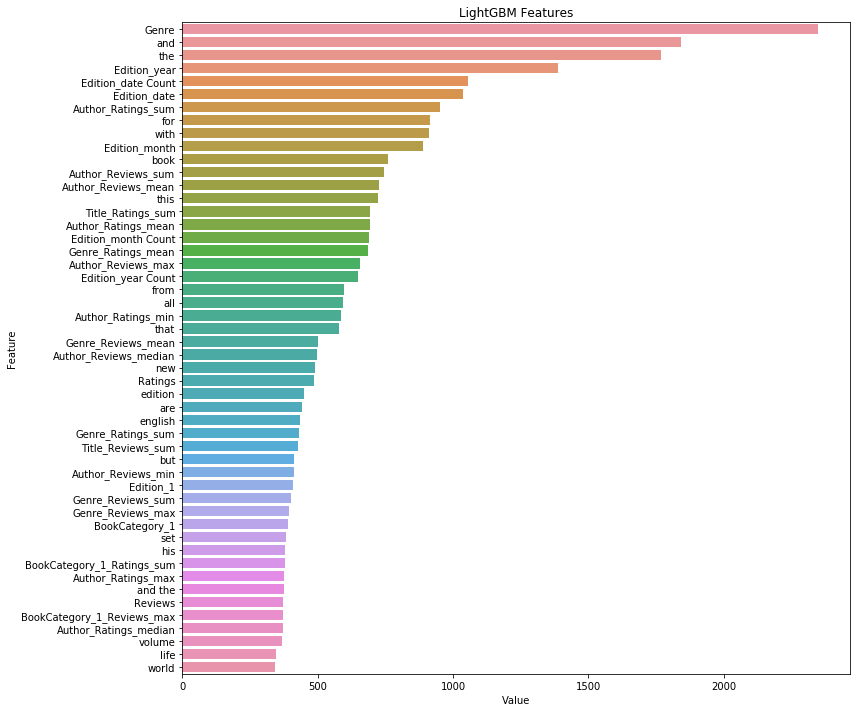

In [40]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test_df


In [42]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.5076896879690266
RMSLE LGBM:  0.45456073744361203
RMSLE LGBM:  0.42332471675221917
RMSLE LGBM:  0.47650197542475065
RMSLE LGBM:  0.5022121243221463
RMSLE LGBM:  0.5090770631271005
RMSLE LGBM:  0.4906471746236949
RMSLE LGBM:  0.49265452260419107
RMSLE LGBM:  0.4862479380747877
RMSLE LGBM:  0.5113761900782505
RMSLE LGBM:  0.5135205005280176
RMSLE LGBM:  0.49950802333885425
RMSLE LGBM:  0.4789410254003153
RMSLE LGBM:  0.44529641219823374
RMSLE LGBM:  0.4960742483211777


In [43]:
np.mean(errlgb,0)

0.4858421560137585

In [44]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))
lgbm_final

array([ 488.09991916, 1044.51292604,  350.04133617, ...,  312.01009803,
        441.77433622, 1089.43278709])

In [0]:
df_sub = pd.DataFrame(data=lgbm_final, columns=['Price'])
df_sub.to_excel('output.xlsx' ,index=False)
